In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('glass.csv',index_col=0)
df.head()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
Id,,,,,,,,,,
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1 to 214
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   refractive index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type of glass     214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 18.4 KB


In [4]:
df.describe()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


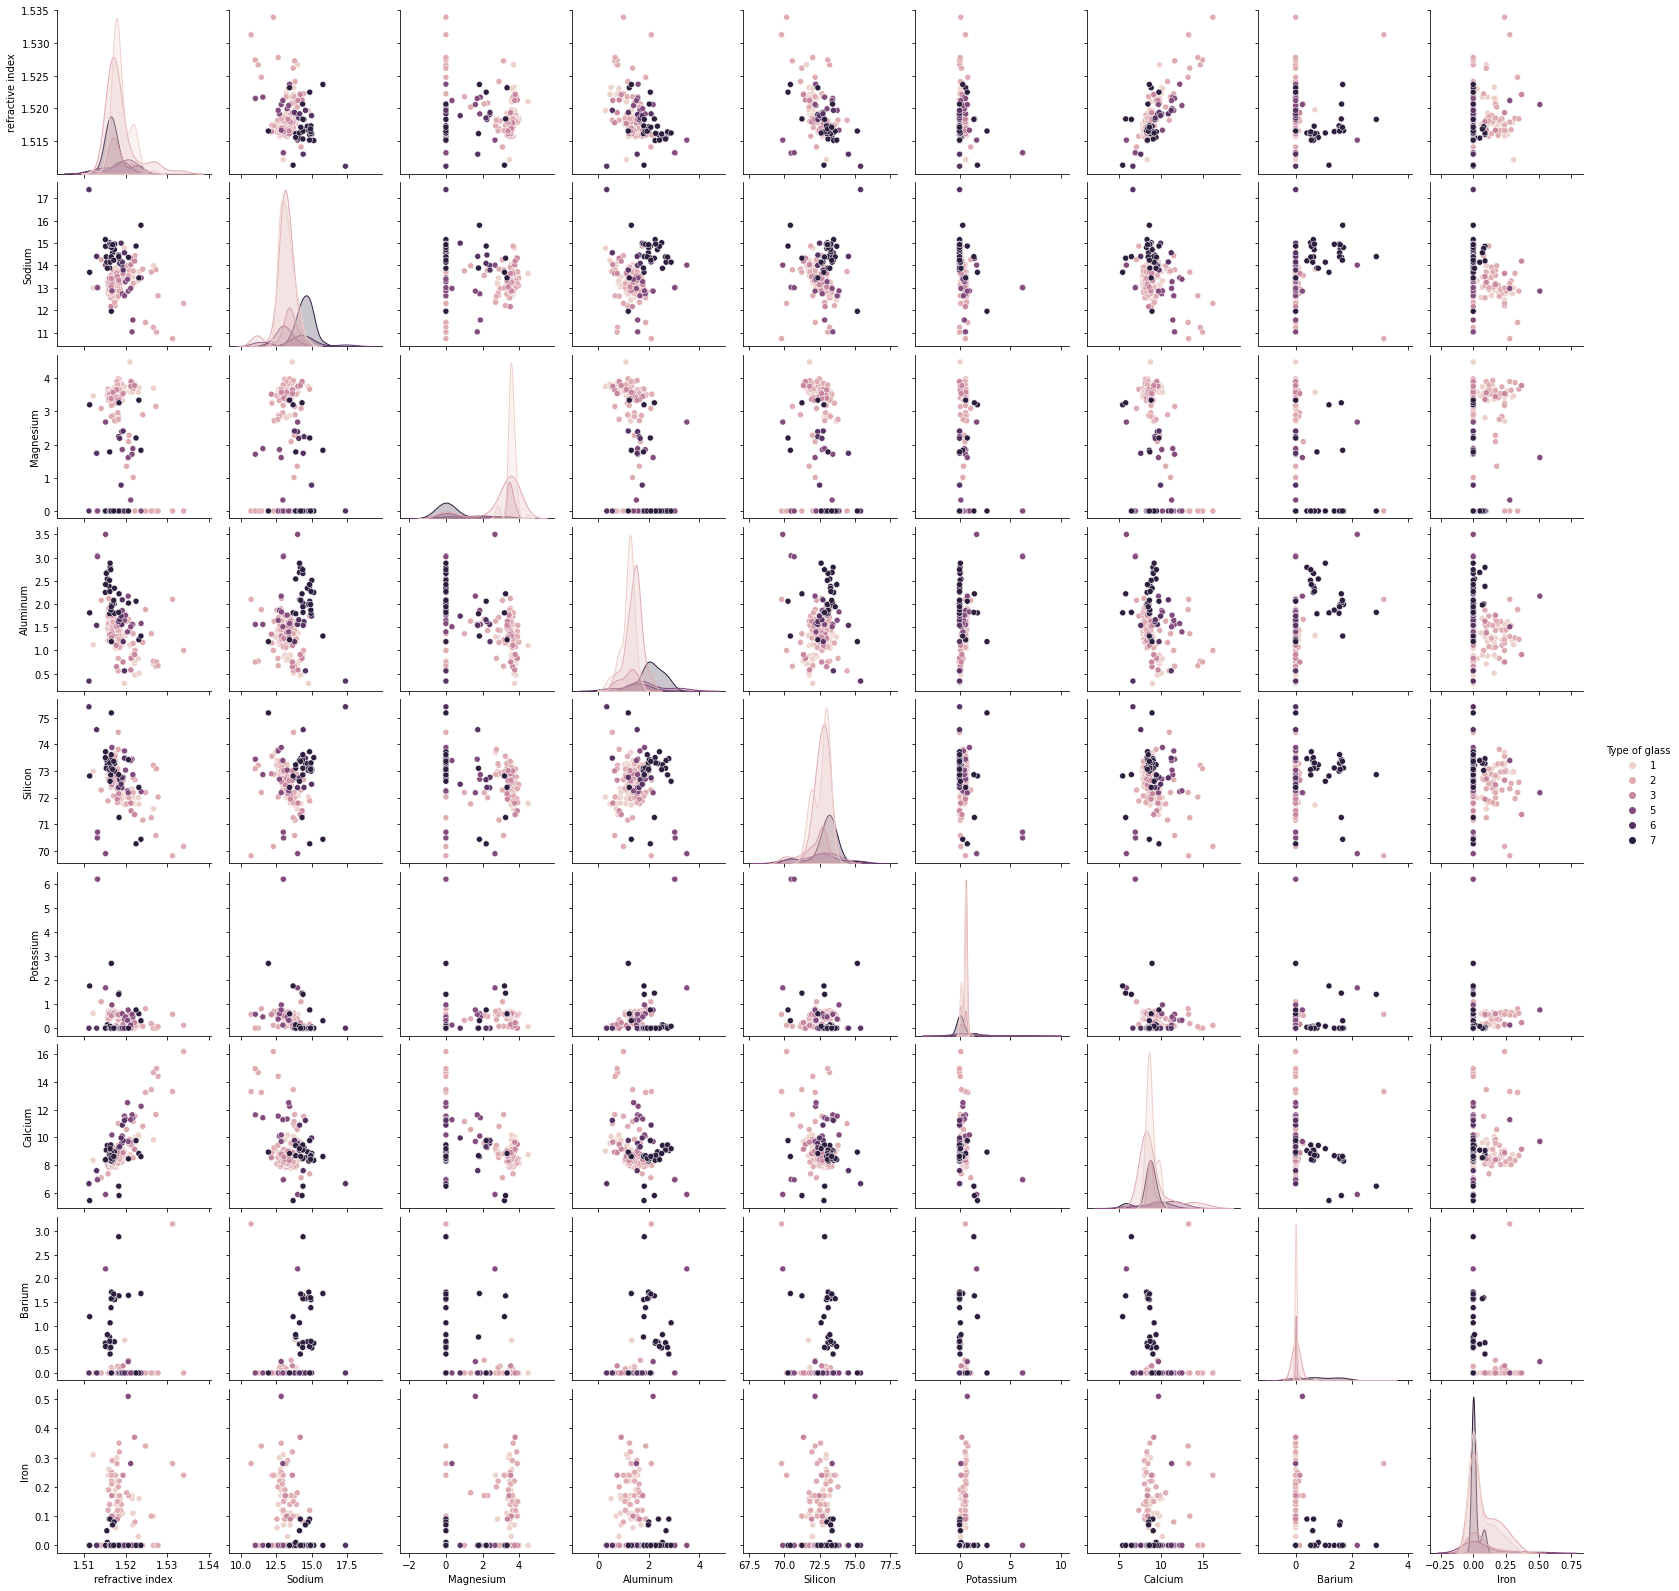

In [5]:
sns.pairplot(data = df,hue='Type of glass')

In [6]:
df.corr()

,refractive index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type of glass
refractive index,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Sodium,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Magnesium,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Aluminum,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Silicon,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
Potassium,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Calcium,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Barium,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Iron,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type of glass,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [7]:
ss = StandardScaler()
X_data,Y_data = df.iloc[:,0:9],df.iloc[:,9]
X_data = ss.fit_transform(X_data)

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X_data,Y_data,random_state=32,test_size=0.25)

In [9]:
dtc = DecisionTreeClassifier(random_state=12)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=12)

In [10]:
dtc.score(X_test,Y_test)

0.7222222222222222

In [11]:
X_train,X_test,Y_train,Y_test = train_test_split(df.iloc[:,0:9],df.iloc[:,9],random_state=32,test_size=0.25)
dtc = DecisionTreeClassifier(random_state=12)
dtc.fit(X_train,Y_train)
dtc.score(X_test,Y_test)

0.7222222222222222

In [12]:
rfc = RandomForestClassifier(max_depth=9, random_state=0)
rfc.fit(X_train,Y_train)
rfc.score(X_test,Y_test)

0.7962962962962963